In [1]:
from traffic.core import Traffic

from traffic.data import navaids

In [2]:
nav = navaids.extent("LSZH")
nav

/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,type,latitude,longitude,altitude,frequency,magnetic_variation,description
13193,17THR,FIX,47.386647,8.702436,NaN,NaN,NaN,None
17030,22LOC,FIX,47.384075,8.714000,NaN,NaN,NaN,None
17792,23LOC,FIX,47.128417,8.345897,NaN,NaN,NaN,None
23355,30LOC,FIX,47.380050,8.732703,NaN,NaN,NaN,None
23356,30LOC,FIX,47.517811,8.506894,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...
285470,IZW,DME,47.457528,8.566611,1423.0,109.75,NaN,LSZH 28 DME-ILS
285471,IZS,DME,47.451250,8.551833,1410.0,110.75,NaN,LSZH 34 DME-ILS
288377,KLO,DME,47.457139,8.545583,1410.0,114.85,NaN,KLOTEN ZURICH VOR-DME
290121,TRA,DME,47.689500,8.436972,1850.0,114.30,NaN,TRASADINGEN VOR-DME


In [3]:
traffic = Traffic.from_file("../deep_traffic_generation/data/denoised_v3.pkl")
traffic

/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
flight_id,
9AJIM_002,200
SWR2291_12969,200
SWR2291_12975,200
SWR2291_12974,200
SWR2291_12973,200
SWR2291_12972,200
SWR2291_12971,200
SWR2291_12970,200
SWR2291_12968,200


In [4]:
",".join(traffic[0].compute_navpoints().navaid.values)

/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'MOSIT,D360B,D153B,KILO'

In [5]:
traffic.data.cluster.value_counts()

/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


15    793600
6     683600
14    612400
13    377000
5     250600
10    155800
8     125000
3     110800
12     95800
11     91200
1      69400
4      57000
7      53600
2      34000
16     29000
9      27400
0      16600
Name: cluster, dtype: int64

In [9]:
cluster = 13

/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
t = traffic.query(f"cluster == {cluster}")
t

,count
flight_id,
9AJIM_003,200
SWR551_15137,200
SWR55X_15242,200
SWR55X_15239,200
SWR55X_15237,200
SWR55X_15233,200
SWR55X_15232,200
SWR55X_15231,200
SWR55X_15230,200


/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


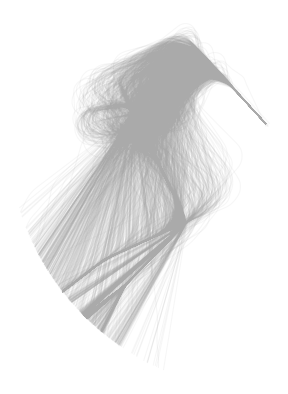

In [11]:
import matplotlib.pyplot as plt
from traffic.core.projection import EuroPP

with plt.style.context("traffic"):
    ax = plt.axes(projection=EuroPP())
    t.plot(ax, alpha=0.1)

In [8]:
t = Traffic.from_flights(
    flight.assign(
        navpoints=",".join(flight.compute_navpoints(navaids=nav).navaid.values)
    )
    for flight in t
)
t.data

/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,timestamp,altitude,callsign,geoaltitude,groundspeed,icao24,lastseen,latitude,longitude,onground,...,runway,initial_bearing,initial_flow,simple,track_unwrapped,x,y,timedelta,cluster,navpoints
11400,2019-10-31 08:45:10+00:00,13775.0,ABP721,14125.0,357.358055,49d044,2019-10-31 09:02:19+00:00,48.118069,8.727722,False,...,14,190.573220,162-216,True,219.436058,479734.736540,5.329563e+06,0.0,15,"RILAX,38LOC,ZH064,D337B"
11401,2019-10-31 08:45:15+00:00,13700.0,ABP721,14050.0,355.950532,49d044,2019-10-31 09:02:19+00:00,48.111694,8.719917,False,...,14,190.573220,162-216,True,219.538124,479151.252645,5.328857e+06,5.0,15,"RILAX,38LOC,ZH064,D337B"
11402,2019-10-31 08:45:19+00:00,13625.0,ABP721,13975.0,356.586287,49d044,2019-10-31 09:02:19+00:00,48.106384,8.713355,False,...,14,190.573220,162-216,True,219.538124,478660.603883,5.328268e+06,9.0,15,"RILAX,38LOC,ZH064,D337B"
11403,2019-10-31 08:45:24+00:00,13525.0,ABP721,13900.0,355.686353,49d044,2019-10-31 09:02:19+00:00,48.100571,8.706116,False,...,14,190.573220,162-216,True,219.867446,478119.173559,5.327624e+06,14.0,15,"RILAX,38LOC,ZH064,D337B"
11404,2019-10-31 08:45:29+00:00,13450.0,ABP721,13800.0,355.562627,49d044,2019-10-31 09:02:19+00:00,48.093979,8.697945,False,...,14,190.573220,162-216,True,220.094420,477507.930478,5.326894e+06,19.0,15,"RILAX,38LOC,ZH064,D337B"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3890395,2019-11-17 11:43:22+00:00,1900.0,YUPMK,1825.0,119.553232,4c3d8a,2019-11-17 11:46:23+00:00,47.488915,8.526729,False,...,14,189.699732,162-216,True,137.021365,464347.170354,5.259708e+06,665.0,15,"TD001,ZH363,D337B"
3890396,2019-11-17 11:43:26+00:00,1850.0,YUPMK,1750.0,120.282896,4c3d8a,2019-11-17 11:46:23+00:00,47.487488,8.528687,False,...,14,189.699732,162-216,True,137.021365,464493.695939,5.259549e+06,669.0,15,"TD001,ZH363,D337B"
3890397,2019-11-17 11:43:29+00:00,1825.0,YUPMK,1725.0,120.341078,4c3d8a,2019-11-17 11:46:23+00:00,47.485936,8.530743,False,...,14,189.699732,162-216,True,137.371842,464647.574091,5.259375e+06,672.0,15,"TD001,ZH363,D337B"
3890398,2019-11-17 11:43:33+00:00,1775.0,YUPMK,1675.0,118.869574,4c3d8a,2019-11-17 11:46:23+00:00,47.484493,8.532715,False,...,14,189.699732,162-216,True,137.045408,464795.167048,5.259214e+06,676.0,15,"TD001,ZH363,D337B"


In [10]:
t.to_pickle(f"../deep_traffic_generation/data/traffic_{cluster}.pkl")

In [1]:
from deep_traffic_generation.core.datasets import TrafficDataset
from traffic.data import navaids

dataset = TrafficDataset("../deep_traffic_generation/data/traffic_15.pkl", ["x", "y", "track_unwrapped", "groundspeed", "altitude", "timedelta"], ["latitude", "longitude"], label="navpoints", mode="image")
dataset

Dataset TrafficDataset
    Number of datapoints: 3968
    File location: ../deep_traffic_generation/data/traffic_15.pkl

In [2]:
dataset[0]

['RILAX', '38LOC', 'ZH064', 'D337B']


/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: too many dimensions 'str'

In [ ]:
navaids['RILAX']